# Exploratory Data Analysis

Use Subject 4 as an example

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style("whitegrid")

**Loading data and coverting to panda data frame**

In [2]:
with open("WESAD/S4/S4.pkl", "rb") as f:
    data = pickle.load(f,encoding="latin1")
print(data.keys())

dict_keys(['signal', 'label', 'subject'])


In [3]:
print('Signal:',data['signal'].keys())
print('Chest:',data['signal']['chest'].keys())
print('Wrist:',data['signal']['wrist'].keys())
print(data['signal']['chest']['EDA'].shape)

Signal: dict_keys(['chest', 'wrist'])
Chest: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
Wrist: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])
(4496100, 1)


In [4]:
# Chest signals (700 Hz)
df_chest = {}

for sensor, arr in data['signal']['chest'].items():
    if arr.ndim == 1:
        df_chest[f"chest_{sensor}"] = arr
    else:  # multi-channel
        for i in range(arr.shape[1]):
            df_chest[f"chest_{sensor}_{i}"] = arr[:, i]

# Add labels (same length as chest signals, sampled at 700 Hz)
df_chest["label"] = data["label"]

s2_chest = pd.DataFrame(df_chest)
print(s2_chest.columns)
print(s2_chest.sample(3))

# Wrist signals: separately process since different frequency
s2_wrist_acc = pd.DataFrame(data['signal']['wrist']['ACC'], columns=["wrist_ACC_0", "wrist_ACC_1", "wrist_ACC_2"])
s2_wrist_bvp = pd.DataFrame(data['signal']['wrist']['BVP'], columns=["wrist_BVP"])
s2_wrist_eda = pd.DataFrame(data['signal']['wrist']['EDA'], columns=["wrist_EDA"])
s2_wrist_temp = pd.DataFrame(data['signal']['wrist']['TEMP'], columns=["wrist_TEMP"])
print(s2_wrist_acc.sample(3))

# Wrist signals (64 Hz), Need to trim to the shortest length
#min_len_wrist = min(arr.shape[0] for arr in data['signal']['wrist'].values())
#df_wrist = {}

#for sensor, arr in data['signal']['wrist'].items():
#    arr = arr[:min_len_wrist]  # trim
#    if arr.ndim == 1:
#        df_wrist[f"wrist_{sensor}"] = arr
#    else:  # multi-channel
#        for i in range(arr.shape[1]):
#            df_wrist[f"wrist_{sensor}_{i}"] = arr[:, i]
#s2_wrist = pd.DataFrame(df_wrist)

#print(data['signal']['wrist']['EDA'].shape,data['signal']['wrist']['BVP'].shape,data['signal']['wrist']['TEMP'].shape,data['signal']['wrist']['ACC'].shape)



Index(['chest_ACC_0', 'chest_ACC_1', 'chest_ACC_2', 'chest_ECG_0',
       'chest_EMG_0', 'chest_EDA_0', 'chest_Temp_0', 'chest_Resp_0', 'label'],
      dtype='object')
         chest_ACC_0  chest_ACC_1  chest_ACC_2  chest_ECG_0  chest_EMG_0  \
1425473       0.7598      -0.1578      -0.5462    -0.094254    -0.009293   
223209        0.7314      -0.4082      -0.4782     0.004120     0.002060   
1700790       0.8618       0.0280      -0.0666     0.203293    -0.034836   

         chest_EDA_0  chest_Temp_0  chest_Resp_0  label  
1425473     1.361847     32.973297     -2.333069      3  
223209      1.248169     32.693024      3.370667      1  
1700790     1.379776     33.186798     -2.500916      0  
        wrist_ACC_0  wrist_ACC_1  wrist_ACC_2
146726        -39.0        -50.0          9.0
119891        -22.0         61.0          3.0
148430        -34.0        -56.0          2.0


## Plots

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

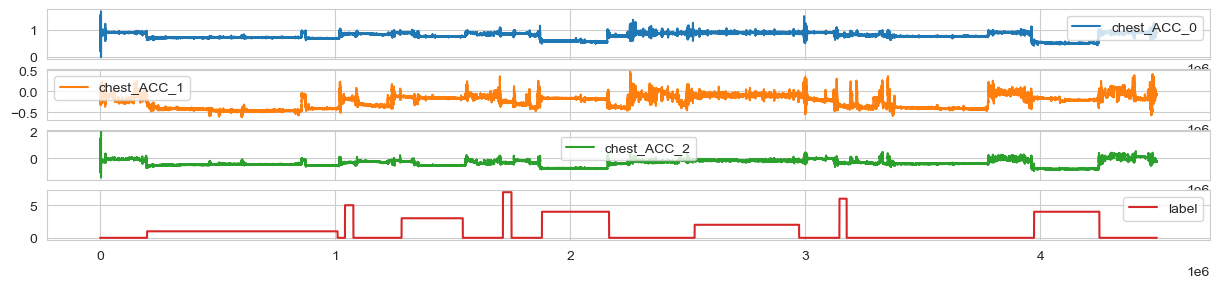

In [5]:
s2_chest[["chest_ACC_0", "chest_ACC_1", "chest_ACC_2","label"]].plot(subplots=True,figsize=(15, 3))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

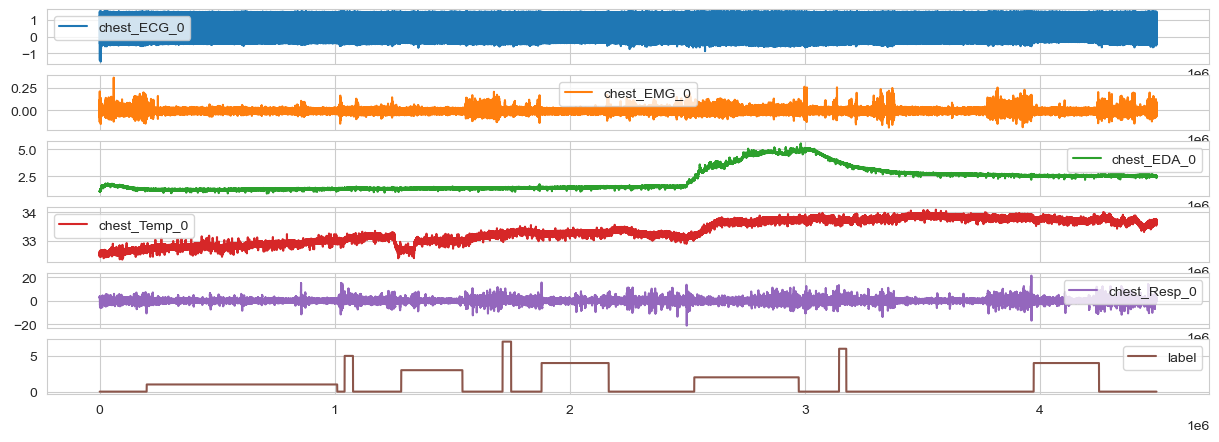

In [6]:
s2_chest[["chest_ECG_0","chest_EMG_0","chest_EDA_0","chest_Temp_0","chest_Resp_0","label"]].plot(subplots=True,figsize=(15, 5))
# temperature sensor is not attached properly


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

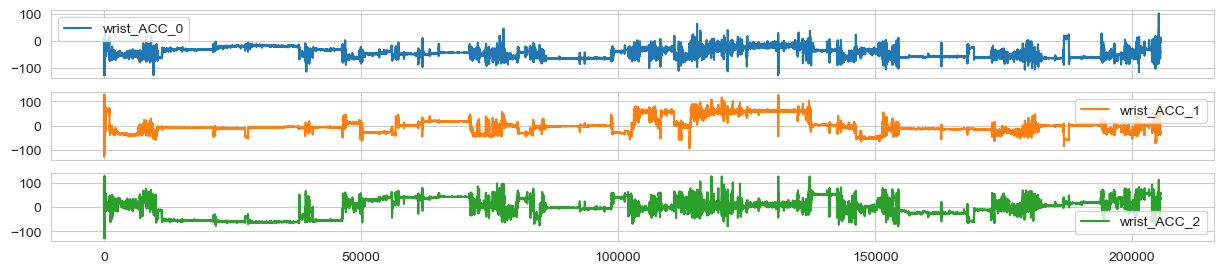

In [7]:
s2_wrist_acc[["wrist_ACC_0", "wrist_ACC_1", "wrist_ACC_2"]].plot(subplots=True,figsize=(15, 3))

<Axes: >

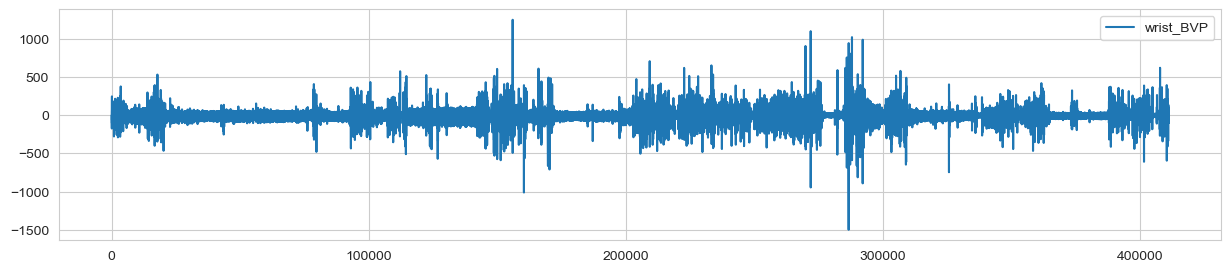

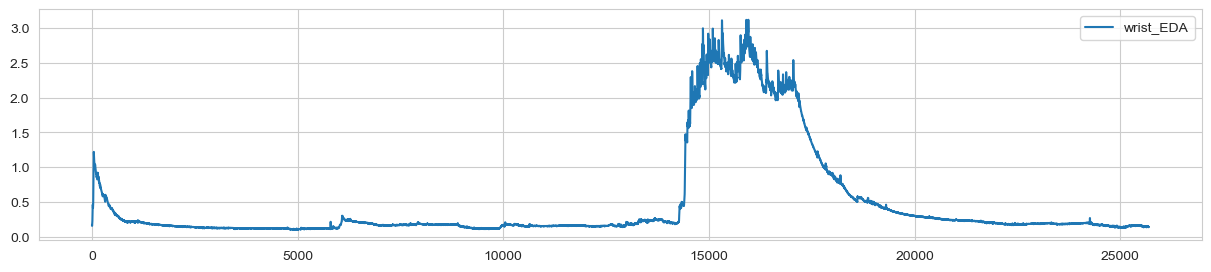

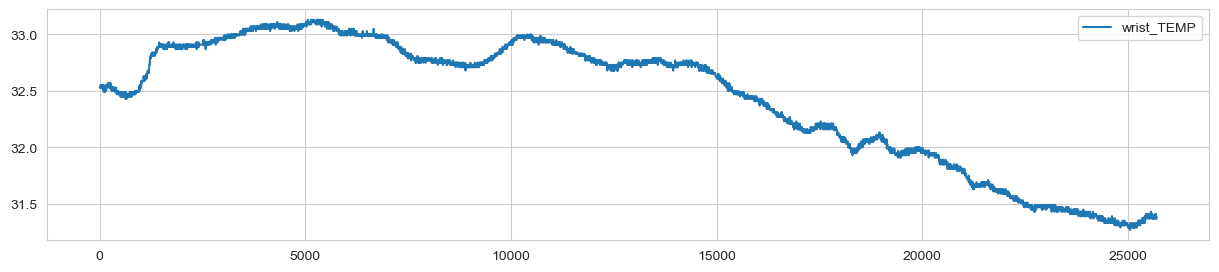

In [8]:
s2_wrist_bvp.plot(figsize=(15, 3))
s2_wrist_eda.plot(figsize=(15, 3))
s2_wrist_temp.plot(figsize=(15, 3))

## Violin plots

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=1)                       # tidy up multi-index


   label  stat       signal     value
0      1  mean  chest_ACC_0  0.716485
1      1   std  chest_ACC_0  0.031829
2      2  mean  chest_ACC_0  0.902871
3      2   std  chest_ACC_0  0.014161
4      3  mean  chest_ACC_0  0.787476


/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


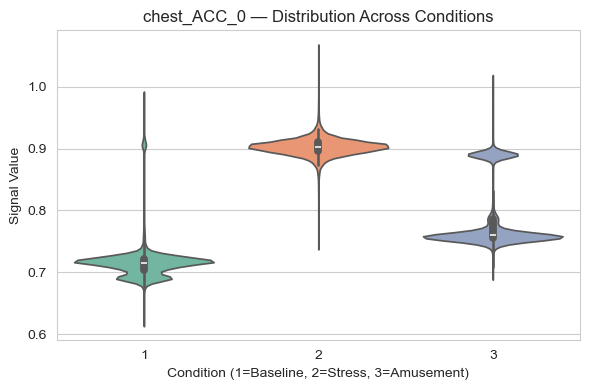

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


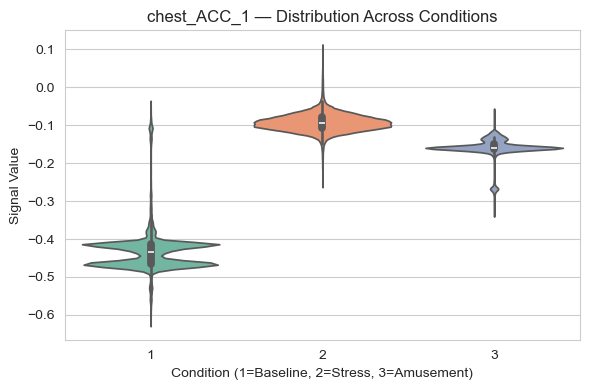

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


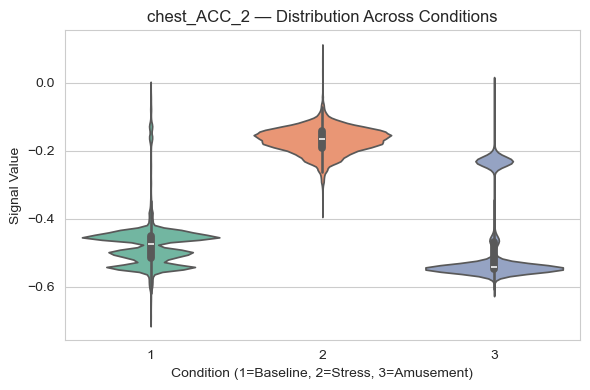

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


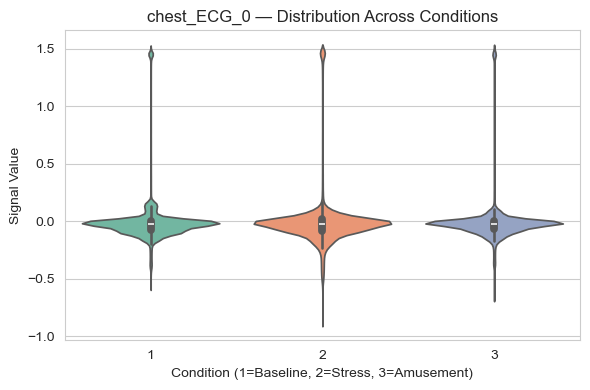

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


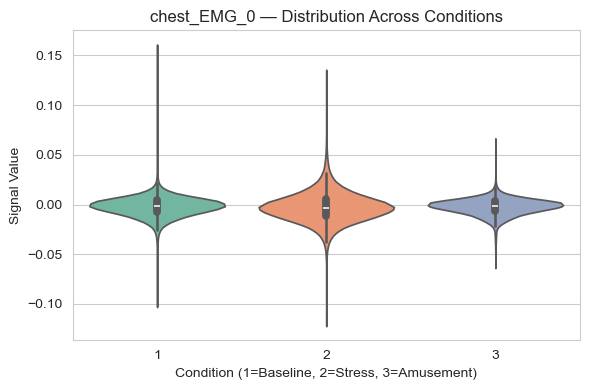

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


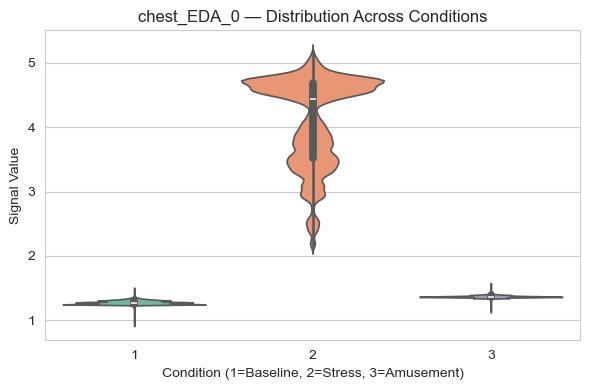

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


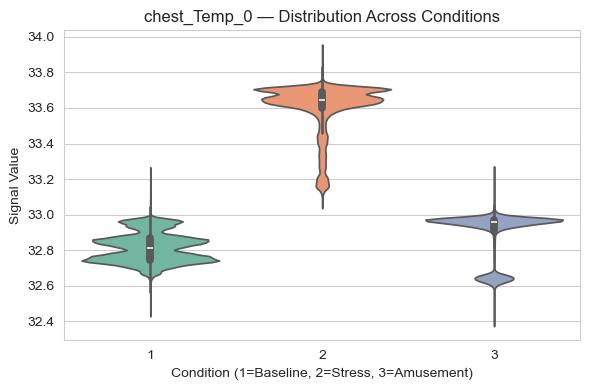

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/4079356429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


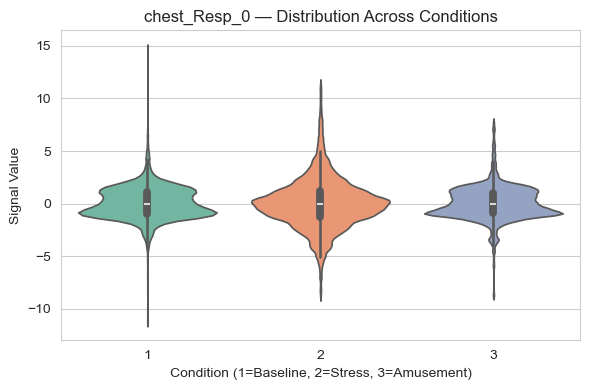

In [9]:
signal_cols = [c for c in s2_chest.columns if c != "label"]
features_long = (
    s2_chest.groupby("label")[signal_cols]
    .agg(["mean", "std"])                 # compute both at once
    .loc[[1, 2, 3]]                       # keep baseline, stress, amusement
    .stack(level=1)                       # tidy up multi-index
    .reset_index()
    .melt(id_vars=["label", "level_1"], var_name="signal", value_name="value")
    .rename(columns={"level_1": "stat"})
)
print(features_long.head())

signals = features_long["signal"].unique()
for sig in signals:
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        data=s2_chest[s2_chest["label"].isin([1, 2, 3])],
        x="label", y=sig, palette="Set2"
    )
    plt.title(f"{sig} — Distribution Across Conditions")
    plt.xlabel("Condition (1=Baseline, 2=Stress, 3=Amusement)")
    plt.ylabel("Signal Value")
    plt.tight_layout()
    plt.show()

## Lag plot

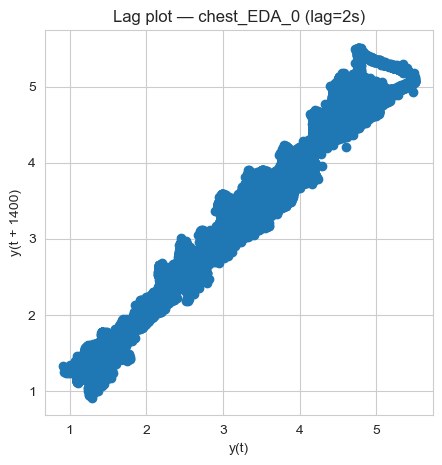

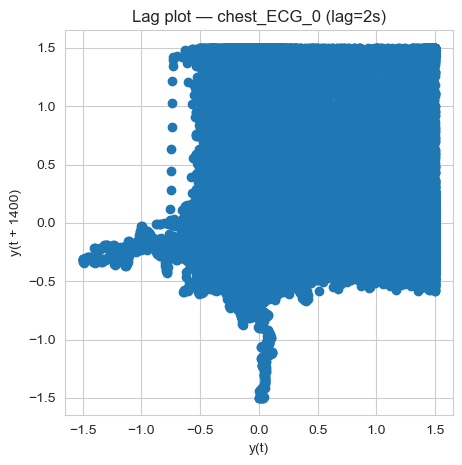

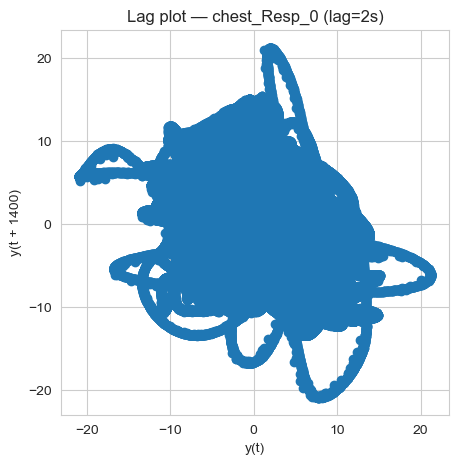

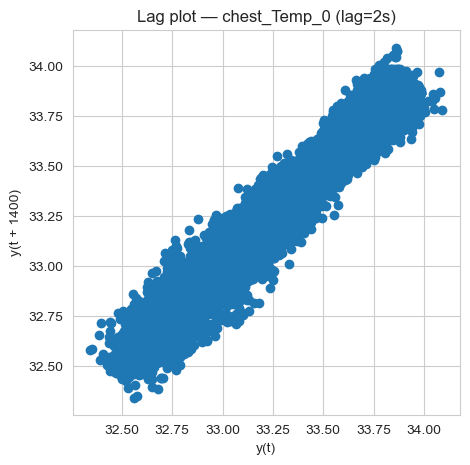

In [10]:
from pandas.plotting import lag_plot

signals = ["chest_EDA_0", "chest_ECG_0", "chest_Resp_0","chest_Temp_0"]
fs=700  # Hz
n_lags = fs *2  # 2 seconds

for sig in signals:
    plt.figure(figsize=(5,5))
    lag_plot(s2_chest[sig], lag=n_lags)
    plt.title(f"Lag plot — {sig} (lag=2s)")
    plt.show()

## Correlation matrix

              chest_ECG_0  chest_EDA_0  chest_Resp_0  chest_Temp_0
chest_ECG_0      1.000000    -0.000097     -0.003128      0.000383
chest_EDA_0     -0.000097     1.000000     -0.000546      0.760418
chest_Resp_0    -0.003128    -0.000546      1.000000     -0.001235
chest_Temp_0     0.000383     0.760418     -0.001235      1.000000


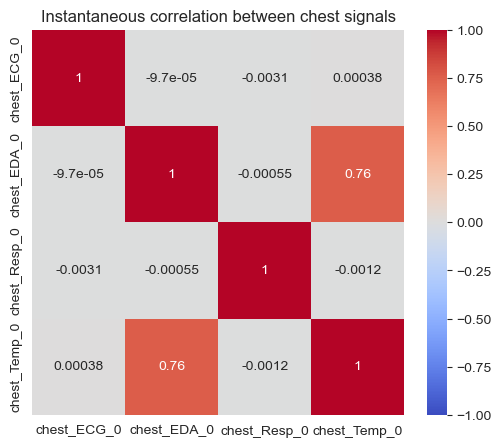

In [11]:
signals = ["chest_ECG_0", "chest_EDA_0", "chest_Resp_0","chest_Temp_0"]

# Compute Pearson correlation matrix
corr_matrix = s2_chest[signals].corr(method='pearson')

print(corr_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Instantaneous correlation between chest signals")
plt.show()

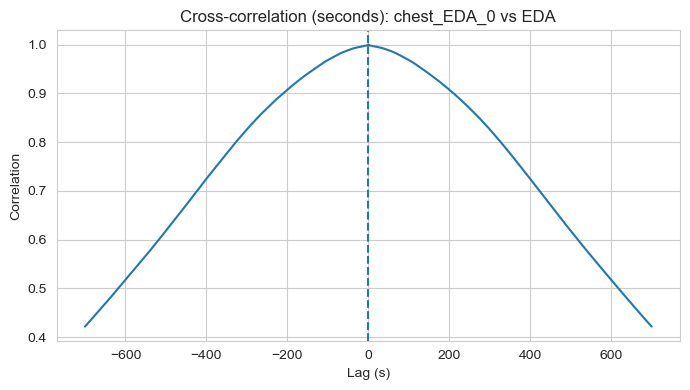

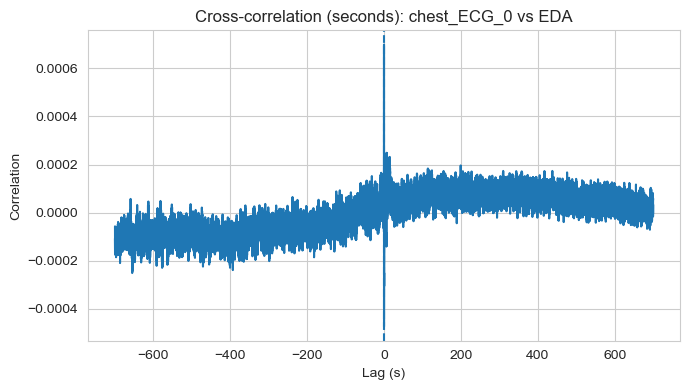

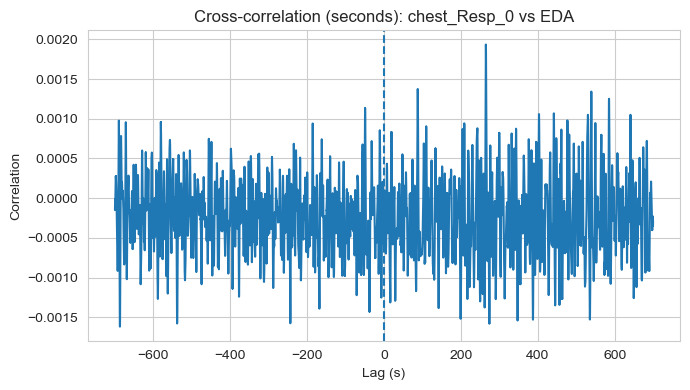

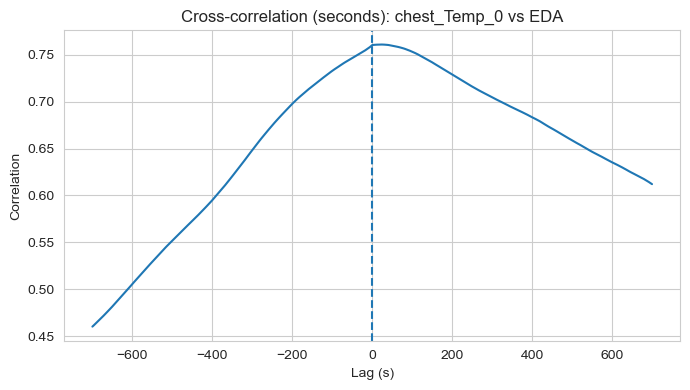

In [12]:

def xcorr_seconds_fft(x, y, fs, max_lag_s, decimate=None):
    """
    Cross-correlation of x and y; returns lags in SECONDS and normalized correlation.
    Uses FFT for O(N log N) performance. Optional decimation for extra speed.
    """
    # Optional speed-up: decimate by simple striding (use scipy.signal.decimate for AA-filtered)
    if decimate and decimate > 1:
        x = x[::decimate]
        y = y[::decimate]
        fs = fs / decimate  # sampling rate changes accordingly

    # Z-score normalize (scale-invariant correlation)
    x = (x - x.mean()) / x.std()
    y = (y - y.mean()) / y.std()

    # FFT-based cross-correlation: conv(x, reversed y)
    # corr_full has length 2N-1, lags from -(N-1) ... +(N-1)
    n = len(x)
    # Next power of two for speed (optional)
    nfft = 1 << (2 * n - 1).bit_length()
    X = np.fft.rfft(x, nfft)
    Y = np.fft.rfft(y[::-1], nfft)  # reverse y
    corr_full = np.fft.irfft(X * Y, nfft)[:2*n-1] / n

    # Lag axis in samples (centered at zero)
    lags_samp = np.arange(-n + 1, n)
    # Convert to seconds
    lags_sec = lags_samp / fs

    # Keep only desired ±max_lag_s window
    mask = (lags_sec >= -max_lag_s) & (lags_sec <= max_lag_s)
    return lags_sec[mask], corr_full[mask]


fs = 700.0
signals = ["chest_EDA_0", "chest_ECG_0", "chest_Resp_0","chest_Temp_0"]

for sig in signals:
    x = s2_chest[sig].values
    y = s2_chest["chest_EDA_0"].values

    lags_sec, corr = xcorr_seconds_fft(x, y, fs, max_lag_s=700.0, decimate=10)  # decimate=10 for speed

    plt.figure(figsize=(7,4))
    plt.plot(lags_sec, corr)
    plt.title("Cross-correlation (seconds): {} vs EDA".format(sig))
    plt.xlabel("Lag (s)")
    plt.ylabel("Correlation")
    plt.axvline(0, ls="--")
    plt.tight_layout()
    plt.show()


## ECG features

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/1554243410.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/1554243410.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/1554243410.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_94

,mean_HR,std_HR,mean_HRV,std_HRV,NN50,pNN50,rmsHRV,LF_HF_ratio,ULF_power,LF_power,HF_power,UHF_power,total_HRV_power,LFnorm,HFnorm,label,window_start
14,117.385696,107.066320,511.135531,107.066320,108,93.103448,195.138667,1.670636,0.0,311.244256,186.302853,570.052231,1067.599340,0.291537,0.174506,1,420.0
50,91.396050,118.430589,656.483516,118.430589,23,25.555556,117.878161,0.000000,0.0,0.000000,2249.171281,4082.377572,6331.548853,0.000000,0.355232,2,1500.0
42,112.460553,154.477504,533.520408,154.477504,39,35.135135,152.762693,0.789565,0.0,2274.812379,2881.094453,6027.300125,11183.206956,0.203413,0.257627,2,1260.0
55,97.329065,144.898681,616.465390,144.898681,32,33.333333,124.815936,0.000000,0.0,0.000000,7338.030324,3929.344819,11267.375143,0.000000,0.651264,2,1650.0
57,93.039874,115.748193,644.884793,115.748193,28,30.434783,119.611079,0.000000,0.0,0.000000,3097.719371,1997.901369,5095.620740,0.000000,0.607918,2,1710.0


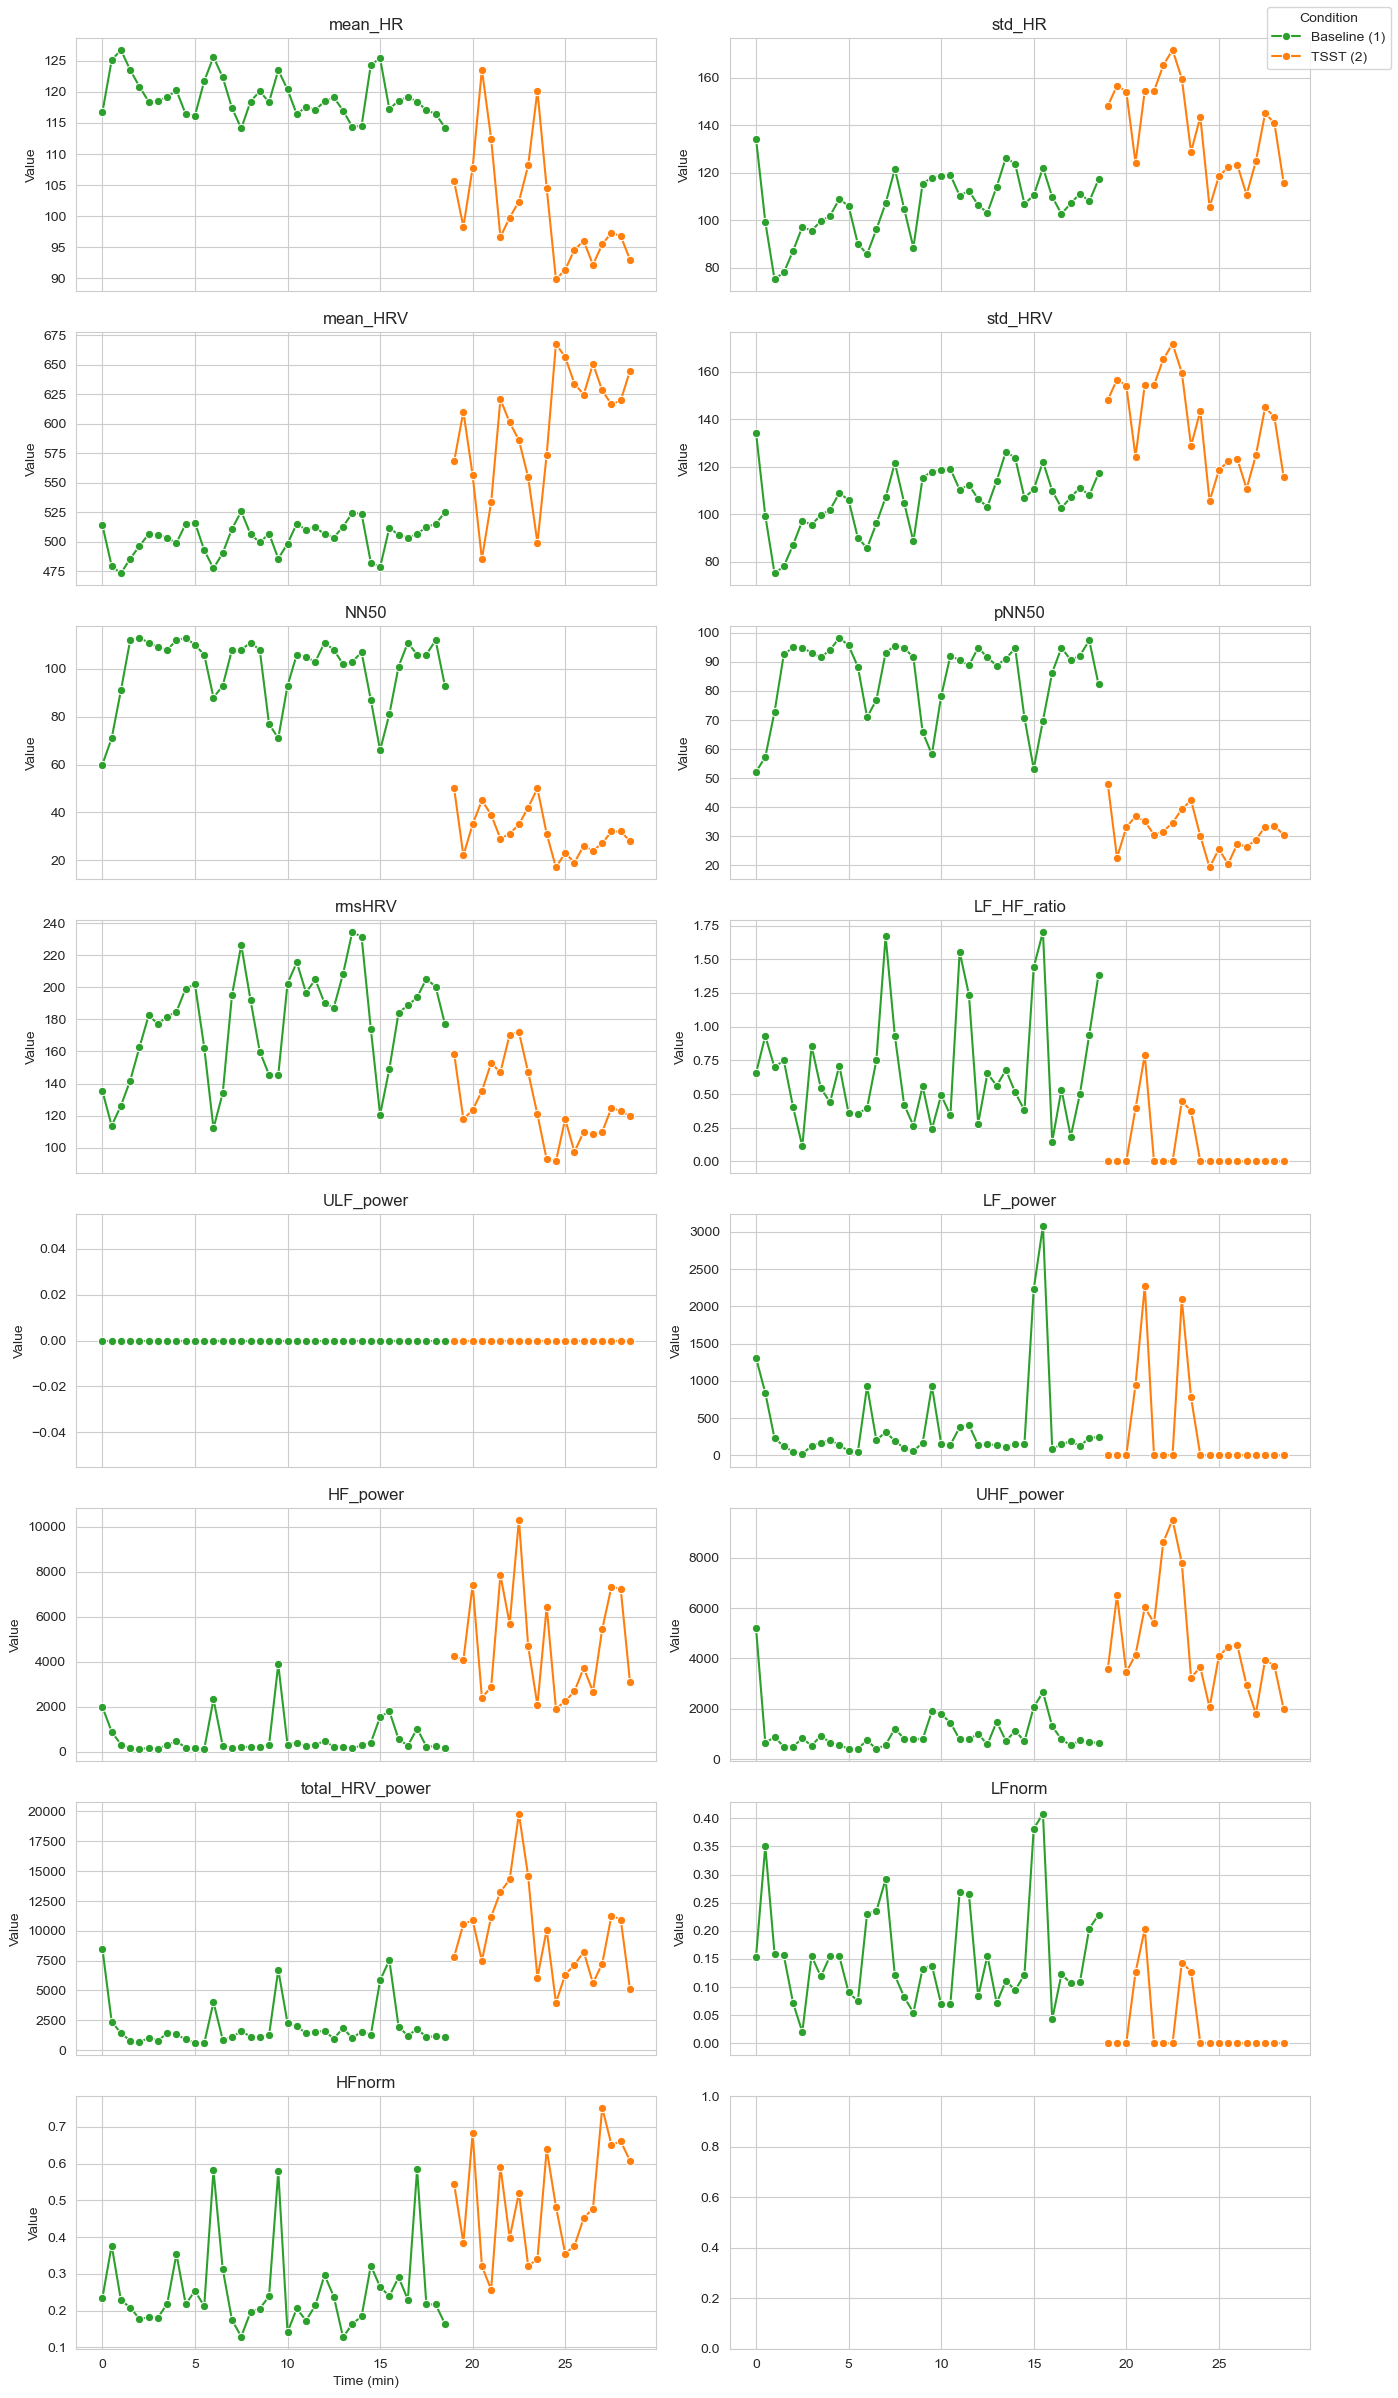

In [36]:
from scipy.signal import find_peaks, welch
import math

# --- Parameters ---
fs = 700                # chest ECG sampling frequency
win_len = 60 * fs       # 60-second window

# --- Select ECG during baseline(1) and stress(2) ---
ecg = s2_chest.loc[s2_chest['label'].isin([1,2]), ['chest_ECG_0','label']].reset_index(drop=True)

# --- Helper: extract HRV features from one window ---
def hrv_features(rr, fs=700):
    if len(rr) < 2: return {}
    rr_ms = np.diff(rr) / fs * 1000  # convert to milliseconds
    rr_ms = rr_ms[(rr_ms > 300) & (rr_ms < 2000)]  # keep plausible RR intervals
    mean_rr = np.mean(rr_ms)
    hr = 60000 / mean_rr
    diff_rr = np.diff(rr_ms)
    f, pxx = welch(rr_ms, fs=4.0, nperseg=len(rr_ms)//2)
    bands = {'ULF':(0.01,0.04), 'LF':(0.04,0.15), 'HF':(0.15,0.4), 'UHF':(0.4,1.0)}
    band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
    total_power = sum(band_powers.values())
    return {
        'mean_HR': hr,
        'std_HR': np.std(rr_ms),
        'mean_HRV': np.mean(rr_ms),
        'std_HRV': np.std(rr_ms),
        'NN50': np.sum(np.abs(diff_rr) > 50),
        'pNN50': np.mean(np.abs(diff_rr) > 50) * 100,
        'rmsHRV': np.sqrt(np.mean(diff_rr**2)),
        'LF_HF_ratio': band_powers['LF']/band_powers['HF'] if band_powers['HF']>0 else np.nan,
        **{f'{b}_power': band_powers[b] for b in bands},
        'total_HRV_power': total_power,
        'LFnorm': band_powers['LF']/total_power if total_power>0 else np.nan,
        'HFnorm': band_powers['HF']/total_power if total_power>0 else np.nan,
    }

# --- Sliding 60 s windows ---
features = []
for start in range(0, len(ecg) - win_len + 1, win_len // 2):
    seg = ecg.iloc[start:start+win_len]
    if len(seg) < win_len: break
    label = seg['label'].mode()[0]
    sig = seg['chest_ECG_0'].values
    peaks, _ = find_peaks(sig, distance=fs*0.4)  # roughly 40 bpm minimum
    feats = hrv_features(peaks, fs)
    feats['label'] = label
    feats['window_start'] = start/fs
    features.append(feats)

df_features = pd.DataFrame(features)
display(df_features.sample(5))


# --- Plot ---
df_features['time_min'] = df_features['window_start'] / 60

# Identify all numeric features (exclude label, time)
feature_cols = [c for c in df_features.columns if c not in ['label', 'window_start', 'time_min']]

# Consistent colors
palette = {1: "tab:green", 2: "tab:orange"}

# Grid layout (2 columns)
n_feats = len(feature_cols)
ncols = 2
nrows = math.ceil(n_feats / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 3 * nrows), sharex=True)
axes = axes.flatten()

for i, feat in enumerate(feature_cols):
    sns.lineplot(
        data=df_features,
        x="time_min", y=feat, hue="label", ax=axes[i],
        palette=palette, marker="o"
    )
    axes[i].set_title(feat)
    axes[i].set_xlabel("Time (min)")
    axes[i].set_ylabel("Value")
    axes[i].get_legend().remove()

# One shared legend (top-right)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ["Baseline (1)", "TSST (2)"], title="Condition", loc="upper right")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


## Priliminary model training: RF and LDA

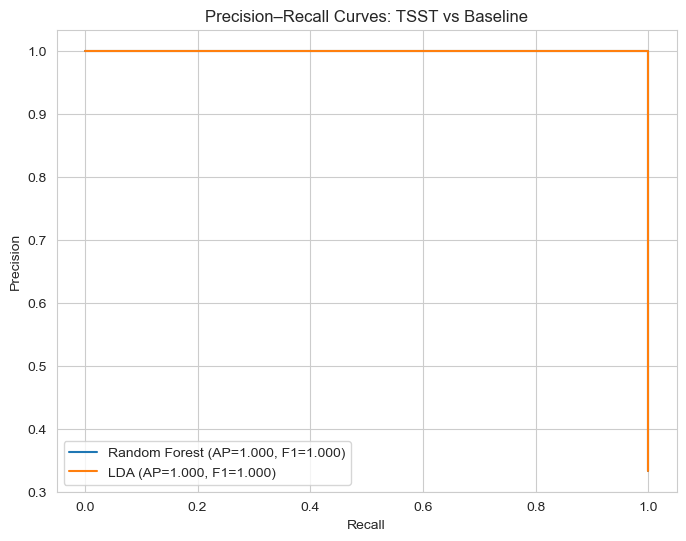


=== Random Forest ===
              precision    recall  f1-score   support

    Baseline       1.00      1.00      1.00         4
        TSST       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


=== LDA ===
              precision    recall  f1-score   support

    Baseline       1.00      1.00      1.00         4
        TSST       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


F1-scores summary:
Random Forest    1.0
LDA              1.0
dtype: float64


In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_recall_curve,
    average_precision_score,
)

# --- Prepare data ---
X = df_features.drop(columns=["label", "window_start"], errors="ignore")
y = (df_features["label"] == 2).astype(int)  # 1 = TSST (stress), 0 = baseline

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Define models ---
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "LDA": Pipeline([
        ("scale", StandardScaler()),
        ("lda", LinearDiscriminantAnalysis())
    ]),
}

# --- Train and evaluate ---
results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = (
        model.predict_proba(X_test)[:, 1]
        if hasattr(model, "predict_proba")
        else model.decision_function(X_test)
    )

    # F1 score
    f1 = f1_score(y_test, y_pred)
    results[name] = f1

    # Precision–recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f}, F1={f1:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves: TSST vs Baseline")
plt.legend()
plt.grid(True)
plt.show()

# --- Summary report ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Baseline", "TSST"]))

print("\nF1-scores summary:")
print(pd.Series(results))


dict_keys(['signal', 'label', 'subject'])


/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/3037013242.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/3037013242.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/3037013242.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
/var/folders/nr/9bj2cy4x5j515g9vw4_m4_94

,mean_HR,std_HR,mean_HRV,std_HRV,NN50,pNN50,rmsHRV,LF_HF_ratio,ULF_power,LF_power,HF_power,UHF_power,total_HRV_power,LFnorm,HFnorm,label,window_start
51,119.128888,147.077555,503.656174,147.077555,22,18.803419,135.107312,0.575474,0.0,1537.749080,2672.143374,4495.625174,8705.517628,0.176641,0.306948,2,1530.0
47,113.464665,153.179955,528.798989,153.179955,40,35.714286,149.376986,1.158058,0.0,2829.204242,2443.058266,7174.465277,12446.727786,0.227305,0.196281,2,1410.0
32,119.429377,138.477662,502.388956,138.477662,34,28.813559,142.174337,0.089481,0.0,424.295786,4741.765131,6153.623817,11319.684733,0.037483,0.418896,1,960.0
48,104.402696,173.224869,574.697802,173.224869,20,19.417476,141.111526,0.000000,0.0,0.000000,6952.865173,4606.635689,11559.500862,0.000000,0.601485,2,1440.0
10,119.506480,130.828488,502.064826,130.828488,43,36.440678,140.645163,0.244216,0.0,854.659109,3499.610383,4525.712467,8879.981959,0.096246,0.394101,1,300.0


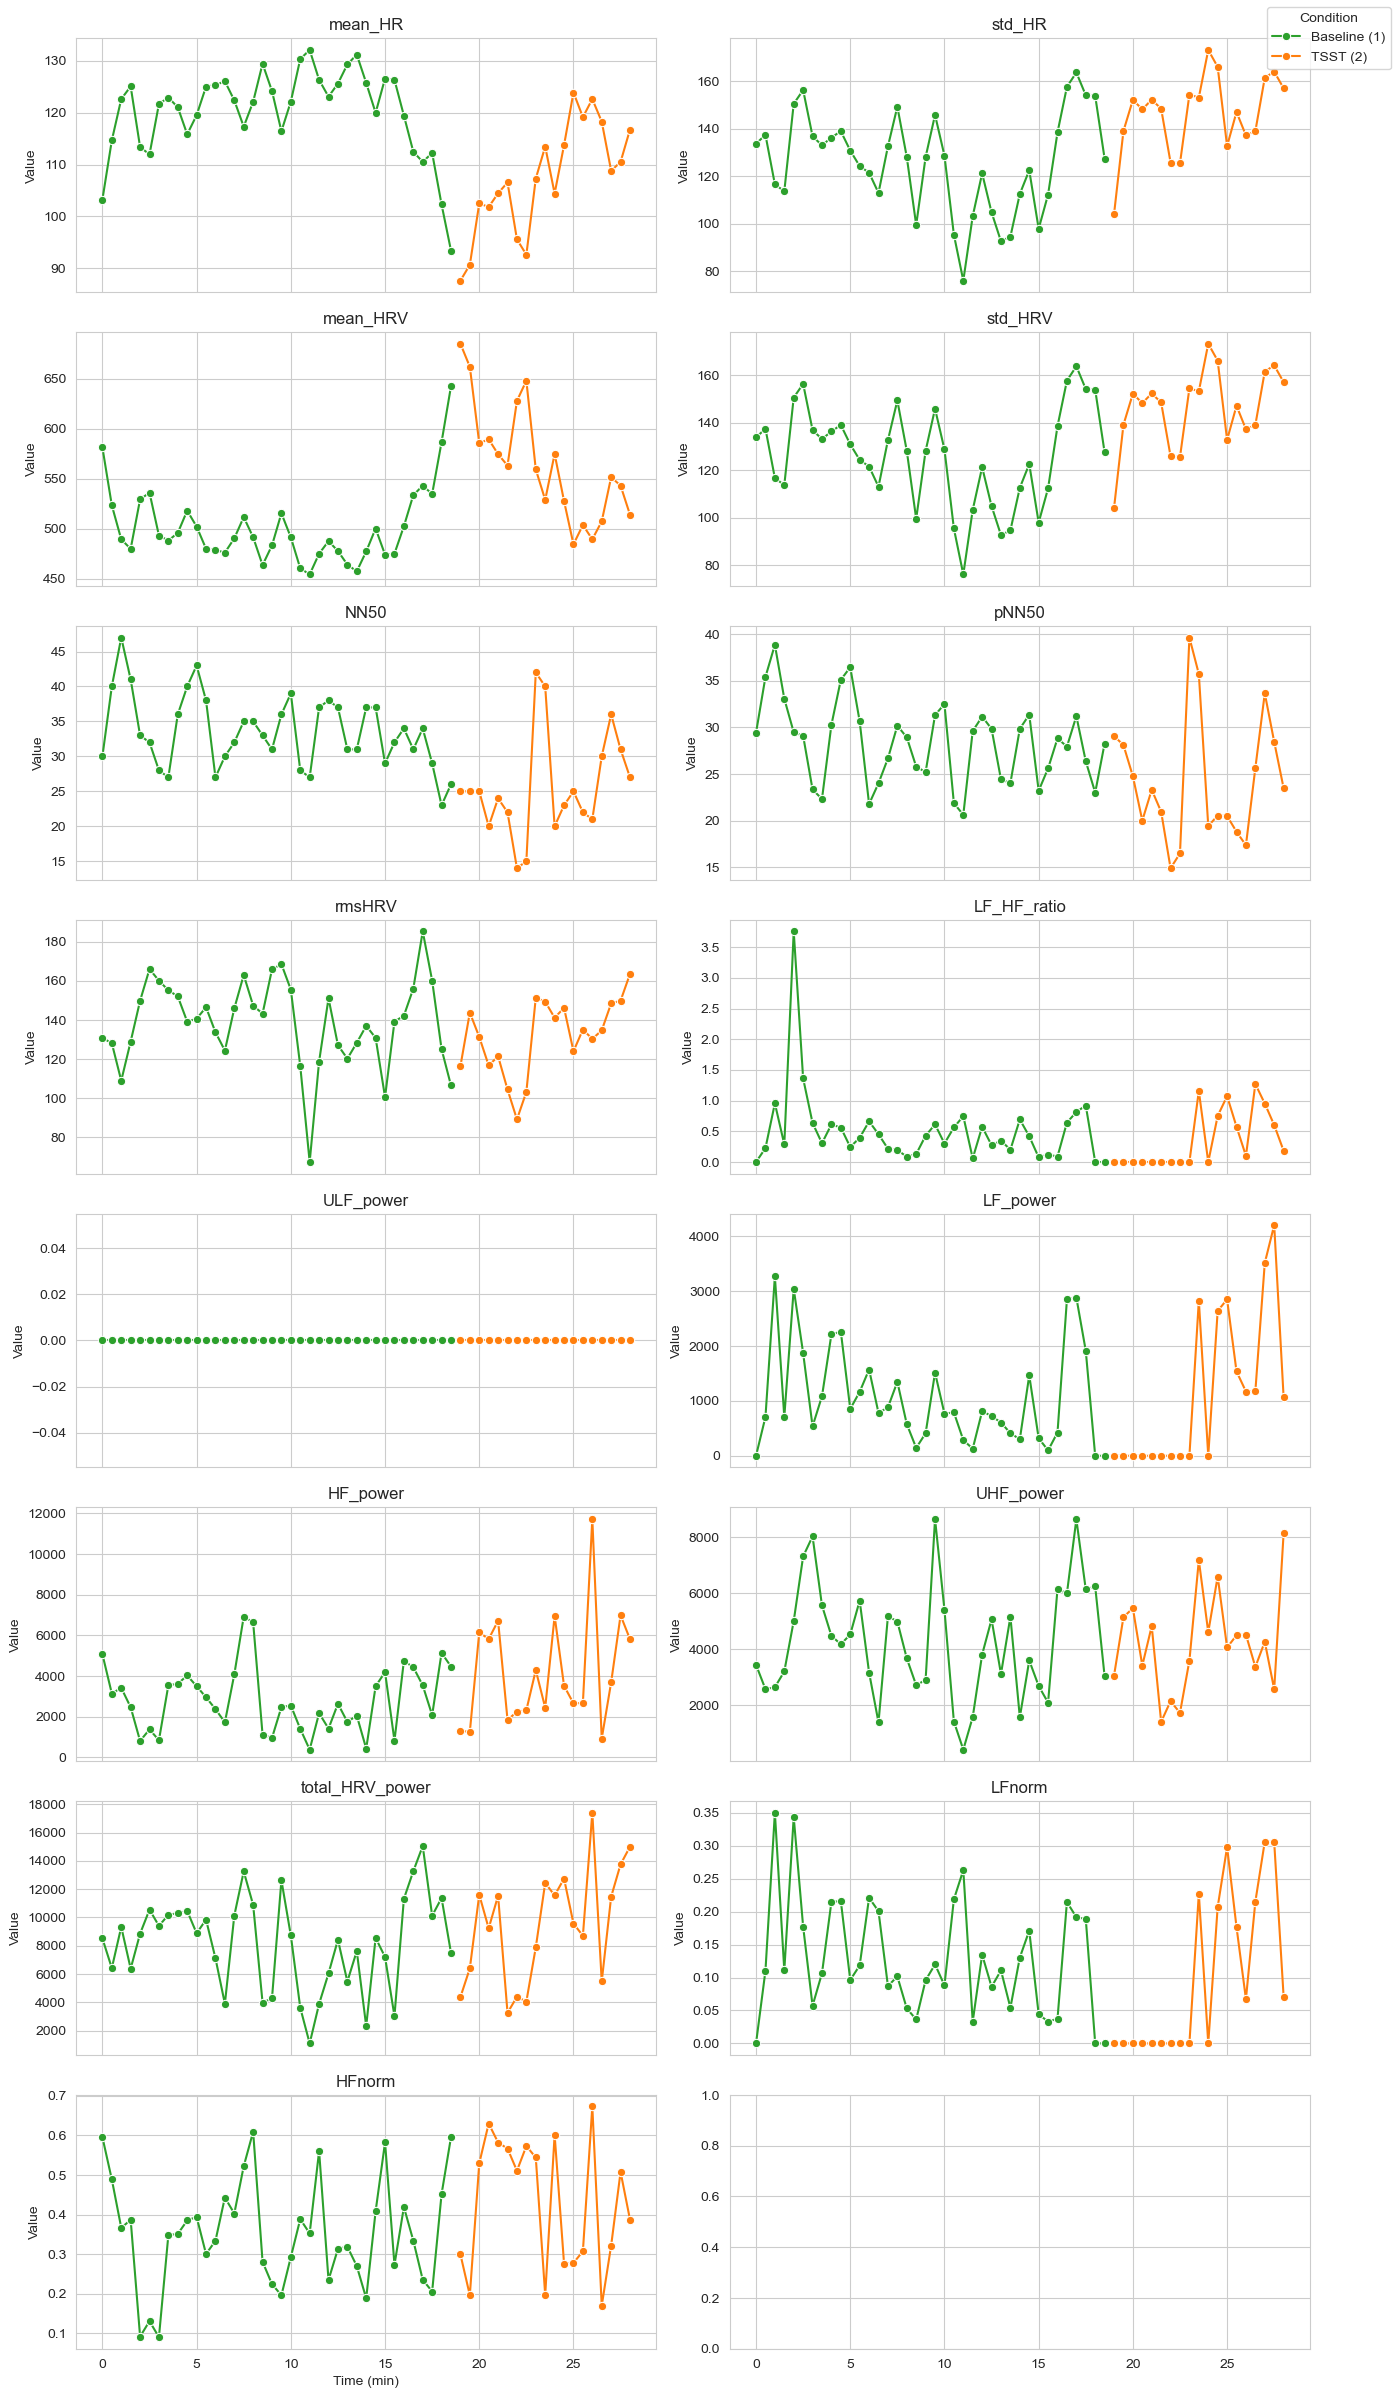

In [35]:
with open("WESAD/S2/S2.pkl", "rb") as f:
    data = pickle.load(f,encoding="latin1")
print(data.keys())
# Chest signals (700 Hz)
df_chest = {}

for sensor, arr in data['signal']['chest'].items():
    if arr.ndim == 1:
        df_chest[f"chest_{sensor}"] = arr
    else:  # multi-channel
        for i in range(arr.shape[1]):
            df_chest[f"chest_{sensor}_{i}"] = arr[:, i]

# Add labels (same length as chest signals, sampled at 700 Hz)
df_chest["label"] = data["label"]

stest_chest = pd.DataFrame(df_chest)
#print(s2_chest.columns)
#print(s2_chest.sample(3))

# Wrist signals: separately process since different frequency
stest_wrist_acc = pd.DataFrame(data['signal']['wrist']['ACC'], columns=["wrist_ACC_0", "wrist_ACC_1", "wrist_ACC_2"])
stest_wrist_bvp = pd.DataFrame(data['signal']['wrist']['BVP'], columns=["wrist_BVP"])
stest_wrist_eda = pd.DataFrame(data['signal']['wrist']['EDA'], columns=["wrist_EDA"])
stest_wrist_temp = pd.DataFrame(data['signal']['wrist']['TEMP'], columns=["wrist_TEMP"])
#print(s2_wrist_acc.sample(3))
from scipy.signal import find_peaks, welch
import math

# --- Parameters ---
fs = 700                # chest ECG sampling frequency
win_len = 60 * fs       # 60-second window

# --- Select ECG during baseline(1) and stress(2) ---
ecg = stest_chest.loc[stest_chest['label'].isin([1,2]), ['chest_ECG_0','label']].reset_index(drop=True)

# --- Helper: extract HRV features from one window ---
def hrv_test_features(rr, fs=700):
    if len(rr) < 2: return {}
    rr_ms = np.diff(rr) / fs * 1000  # convert to milliseconds
    rr_ms = rr_ms[(rr_ms > 300) & (rr_ms < 2000)]  # keep plausible RR intervals
    mean_rr = np.mean(rr_ms)
    hr = 60000 / mean_rr
    diff_rr = np.diff(rr_ms)
    f, pxx = welch(rr_ms, fs=4.0, nperseg=len(rr_ms)//2)
    bands = {'ULF':(0.01,0.04), 'LF':(0.04,0.15), 'HF':(0.15,0.4), 'UHF':(0.4,1.0)}
    band_powers = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
    total_power = sum(band_powers.values())
    return {
        'mean_HR': hr,
        'std_HR': np.std(rr_ms),
        'mean_HRV': np.mean(rr_ms),
        'std_HRV': np.std(rr_ms),
        'NN50': np.sum(np.abs(diff_rr) > 50),
        'pNN50': np.mean(np.abs(diff_rr) > 50) * 100,
        'rmsHRV': np.sqrt(np.mean(diff_rr**2)),
        'LF_HF_ratio': band_powers['LF']/band_powers['HF'] if band_powers['HF']>0 else np.nan,
        **{f'{b}_power': band_powers[b] for b in bands},
        'total_HRV_power': total_power,
        'LFnorm': band_powers['LF']/total_power if total_power>0 else np.nan,
        'HFnorm': band_powers['HF']/total_power if total_power>0 else np.nan,
    }

# --- Sliding 60 s windows ---
features = []
for start in range(0, len(ecg) - win_len + 1, win_len // 2):
    seg = ecg.iloc[start:start+win_len]
    if len(seg) < win_len: break
    label = seg['label'].mode()[0]
    sig = seg['chest_ECG_0'].values
    peaks, _ = find_peaks(sig, distance=fs*0.4)  # roughly 40 bpm minimum
    feats = hrv_test_features(peaks, fs)
    feats['label'] = label
    feats['window_start'] = start/fs
    features.append(feats)

df_test_features = pd.DataFrame(features)
display(df_test_features.sample(5))


# --- Plot ---
df_test_features['time_min'] = df_test_features['window_start'] / 60

# Identify all numeric features (exclude label, time)
feature_cols = [c for c in df_test_features.columns if c not in ['label', 'window_start', 'time_min']]

# Consistent colors
palette = {1: "tab:green", 2: "tab:orange"}

# Grid layout (2 columns)
n_feats = len(feature_cols)
ncols = 2
nrows = math.ceil(n_feats / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 3 * nrows), sharex=True)
axes = axes.flatten()

for i, feat in enumerate(feature_cols):
    sns.lineplot(
        data=df_test_features,
        x="time_min", y=feat, hue="label", ax=axes[i],
        palette=palette, marker="o"
    )
    axes[i].set_title(feat)
    axes[i].set_xlabel("Time (min)")
    axes[i].set_ylabel("Value")
    axes[i].get_legend().remove()

# One shared legend (top-right)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ["Baseline (1)", "TSST (2)"], title="Condition", loc="upper right")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


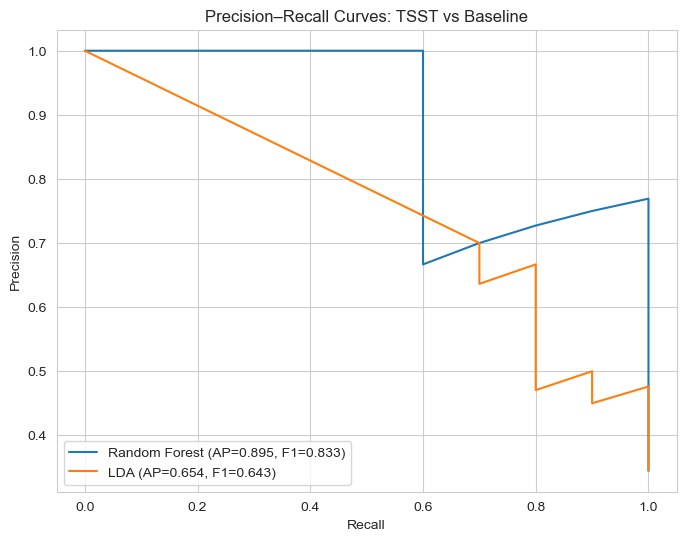


=== Random Forest ===
              precision    recall  f1-score   support

    Baseline       1.00      0.79      0.88        19
        TSST       0.71      1.00      0.83        10

    accuracy                           0.86        29
   macro avg       0.86      0.89      0.86        29
weighted avg       0.90      0.86      0.87        29


=== LDA ===
              precision    recall  f1-score   support

    Baseline       0.91      0.53      0.67        19
        TSST       0.50      0.90      0.64        10

    accuracy                           0.66        29
   macro avg       0.70      0.71      0.65        29
weighted avg       0.77      0.66      0.66        29


F1-scores summary:
Random Forest    0.833333
LDA              0.642857
dtype: float64


In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_recall_curve,
    average_precision_score,
)

# --- Train use S4 ---
X_train = df_features.drop(columns=["label", "window_start"], errors="ignore")
y_train = (df_features["label"] == 2).astype(int)  # 1 = TSST (stress), 0 = baseline
X_test = df_test_features.drop(columns=["label", "window_start"], errors="ignore")
y_test = (df_test_features["label"] == 2).astype(int)  # 1 = TSST (stress), 0 = baseline

# --- Define models ---
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "LDA": Pipeline([
        ("scale", StandardScaler()),
        ("lda", LinearDiscriminantAnalysis())
    ]),
}

# --- Train and evaluate ---
results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = (
        model.predict_proba(X_test)[:, 1]
        if hasattr(model, "predict_proba")
        else model.decision_function(X_test)
    )

    # F1 score
    f1 = f1_score(y_test, y_pred)
    results[name] = f1

    # Precision–recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f}, F1={f1:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves: TSST vs Baseline")
plt.legend()
plt.grid(True)
plt.show()

# --- Summary report ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Baseline", "TSST"]))

print("\nF1-scores summary:")
print(pd.Series(results))


## Reproduce WESAD ML results

/var/folders/nr/9bj2cy4x5j515g9vw4_m4_940000gn/T/ipykernel_67058/1435324595.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bp = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}


Test subjects: ['S5', 'S11', 'S10']

Running LOSO CV on training subjects...

Running LOSO CV on training subjects...


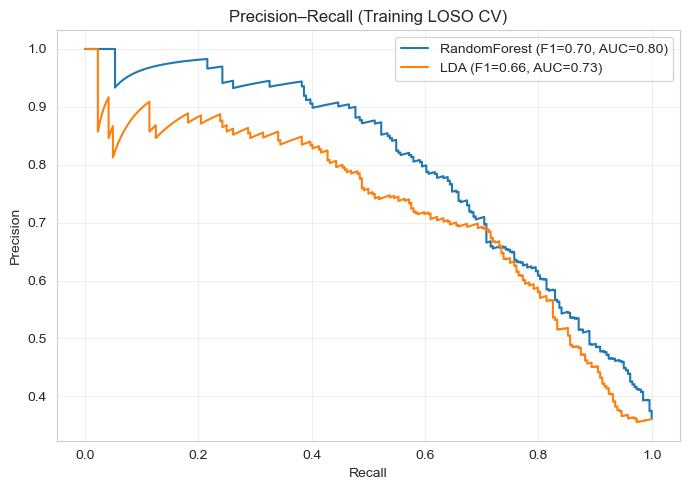


=== RandomForest ===
              precision    recall  f1-score   support

    Baseline       0.83      0.92      0.87       119
        TSST       0.82      0.66      0.73        68

    accuracy                           0.82       187
   macro avg       0.82      0.79      0.80       187
weighted avg       0.82      0.82      0.82       187


=== LDA ===
              precision    recall  f1-score   support

    Baseline       0.80      0.81      0.80       119
        TSST       0.66      0.65      0.65        68

    accuracy                           0.75       187
   macro avg       0.73      0.73      0.73       187
weighted avg       0.75      0.75      0.75       187


F1-scores summary:
Random Forest    0.833333
LDA              0.642857
dtype: float64


In [39]:
import os, glob, pickle, numpy as np, pandas as pd
from scipy.signal import find_peaks, welch
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt
import random

# --- Parameters ---
fs = 700
win_len = 60 * fs
data_path = "WESAD"
subjects = sorted(glob.glob(os.path.join(data_path, "S*/S*.pkl")))

# --- ECG feature extraction ---
def extract_hrv_features(rr_idx):
    if rr_idx is None or len(rr_idx) < 2: return {}
    rr_ms = np.diff(rr_idx) / fs * 1000.0
    rr_ms = rr_ms[(rr_ms > 300) & (rr_ms < 2000)]
    if rr_ms.size < 2: return {}
    diff_rr = np.diff(rr_ms)
    mean_rr = np.mean(rr_ms)
    std_rr  = np.std(rr_ms)
    hr_bpm  = 60000.0 / mean_rr
    f, pxx = welch(rr_ms, fs=4.0, nperseg=max(8, len(rr_ms)//2))
    bands = {"ULF":(0.01,0.04), "LF":(0.04,0.15), "HF":(0.15,0.40), "UHF":(0.40,1.00)}
    bp = {b: np.trapz(pxx[(f>=lo)&(f<hi)], f[(f>=lo)&(f<hi)]) for b,(lo,hi) in bands.items()}
    total = sum(bp.values()) or np.nan
    return {
        "mean_HR": hr_bpm, "std_HR": std_rr, "mean_HRV": mean_rr, "std_HRV": std_rr,
        "NN50": np.sum(np.abs(diff_rr) > 50), "pNN50": np.mean(np.abs(diff_rr) > 50)*100,
        "rmsHRV": np.sqrt(np.mean(diff_rr**2)),
        "LF_HF_ratio": (bp["LF"]/bp["HF"]) if bp["HF"]>0 else np.nan,
        **{f"{b}_power":v for b,v in bp.items()},
        "total_HRV_power": total,
        "LFnorm": (bp["LF"]/total) if total>0 else np.nan,
        "HFnorm": (bp["HF"]/total) if total>0 else np.nan
    }

def process_subject(path):
    with open(path, "rb") as f:
        d = pickle.load(f, encoding="latin1")

    ecg = np.asarray(d["signal"]["chest"]["ECG"]).squeeze()
    labels = np.asarray(d["label"]).astype(int)
    subj_id = os.path.basename(path).split(".")[0]
    feats = []
    for start in range(0, len(ecg) - win_len + 1, win_len // 2):
        seg_sig = ecg[start:start+win_len]
        seg_lab = labels[start:start+win_len]
        vals, counts = np.unique(seg_lab, return_counts=True)
        maj_label = int(vals[np.argmax(counts)])
        if maj_label not in (1, 2):
            continue
        peaks, _ = find_peaks(seg_sig, distance=int(fs*0.4))
        fdict = extract_hrv_features(peaks)
        if not fdict: continue
        fdict["label"] = 1 if maj_label == 2 else 0
        fdict["subject"] = subj_id
        feats.append(fdict)
    return pd.DataFrame(feats)

# --- Combine all subjects ---
all_feat_dfs = [process_subject(f) for f in subjects]
df = pd.concat(all_feat_dfs, ignore_index=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(["label"])
df[numeric_cols] = df.groupby("subject")[numeric_cols].transform(
    lambda x: (x - x.mean()) / x.std()
)
# --- Prepare for modeling ---
X = df.drop(columns=["label", "subject"], errors="ignore").fillna(0.0)
y = df["label"].values.astype(int)
groups = df["subject"].values

subject_ids = sorted(np.unique(groups))

# --- Step 1: Train/test split by subject (hold out 3 subjects) ---
random.seed(42)
test_subjects = random.sample(subject_ids, 3)
train_subjects = [s for s in subject_ids if s not in test_subjects]

print("Test subjects:", test_subjects)

# Masks
train_mask = np.isin(groups, train_subjects)
test_mask  = np.isin(groups, test_subjects)

X_train, y_train, groups_train = X[train_mask], y[train_mask], groups[train_mask]
X_test,  y_test,  groups_test  = X[test_mask],  y[test_mask],  groups[test_mask]

# --- Step 2: LOSO CV on training subjects only ---
logo = LeaveOneGroupOut()
models = {
    "RandomForest": RandomForestClassifier(n_estimators=500, class_weight="balanced", max_depth=10, random_state=42),
    "LDA": Pipeline([("scaler", StandardScaler()), ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto"))])
}

print("\nRunning LOSO CV on training subjects...")
cv_results = {}
plt.figure(figsize=(7,5))
print("\nRunning LOSO CV on training subjects...")
for name, model in models.items():
    y_true_all, y_prob_all = [], []
    for tr, te in logo.split(X_train, y_train, groups_train):
        model.fit(X_train.iloc[tr], y_train[tr])
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_train.iloc[te])[:,1]
        else:
            y_prob = model.decision_function(X_train.iloc[te])
        y_true_all.extend(y_train[te])
        y_prob_all.extend(y_prob)

    y_true_all, y_prob_all = np.array(y_true_all), np.array(y_prob_all)
    precision, recall, _ = precision_recall_curve(y_true_all, y_prob_all)
    auc_pr = auc(recall, precision)
    f1 = f1_score(y_true_all, (y_prob_all >= 0.5).astype(int))
    cv_results[name] = {"F1_trainCV": f1, "AUC_PR_trainCV": auc_pr,
                        "precision": precision, "recall": recall}
    plt.plot(recall, precision, label=f"{name} (F1={f1:.2f}, AUC={auc_pr:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall (Training LOSO CV)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Summary report ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Baseline", "TSST"]))

print("\nF1-scores summary:")
print(pd.Series(results))



Testing on hold-out subjects...


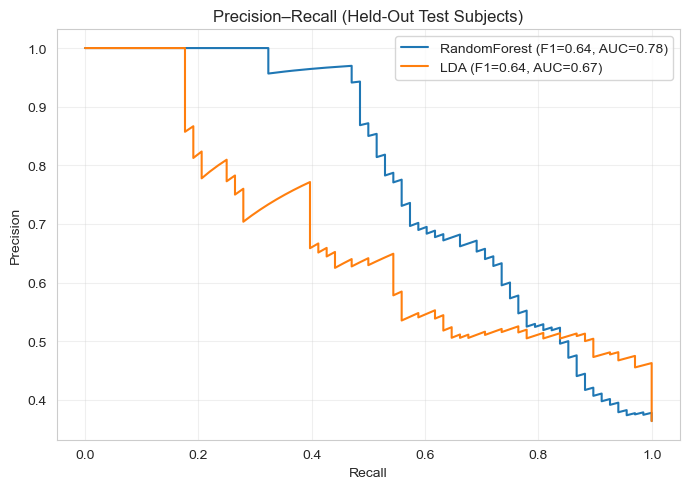


=== RandomForest ===
              precision    recall  f1-score   support

    Baseline       0.84      0.58      0.69       119
        TSST       0.52      0.81      0.64        68

    accuracy                           0.66       187
   macro avg       0.68      0.69      0.66       187
weighted avg       0.73      0.66      0.67       187


=== LDA ===
              precision    recall  f1-score   support

    Baseline       0.89      0.48      0.62       119
        TSST       0.50      0.90      0.64        68

    accuracy                           0.63       187
   macro avg       0.69      0.69      0.63       187
weighted avg       0.75      0.63      0.63       187


F1-scores summary:
Random Forest    0.833333
LDA              0.642857
dtype: float64


In [38]:
# --- Step 3: Train on full training set and evaluate on hold-out subjects ---
test_results = {}
plt.figure(figsize=(7,5))
print("\nTesting on hold-out subjects...")
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    f1 = f1_score(y_test, (y_prob >= 0.5).astype(int))
    test_results[name] = {"F1_test": f1, "AUC_PR_test": auc_pr,
                          "precision": precision, "recall": recall}
    plt.plot(recall, precision, label=f"{name} (F1={f1:.2f}, AUC={auc_pr:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall (Held-Out Test Subjects)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Baseline", "TSST"]))

print("\nF1-scores summary:")
print(pd.Series(results))
